In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'flood.csv'  # Update if your file path is different
df = pd.read_csv(data_path)

# Split features and target
X = df.drop(columns=['FloodProbability'])  # Adjust column name if the target is named differently

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=min(len(X.columns), 10))  # Set number of components; here, it's set to a maximum of 10
X_pca = pca.fit_transform(X_scaled)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_



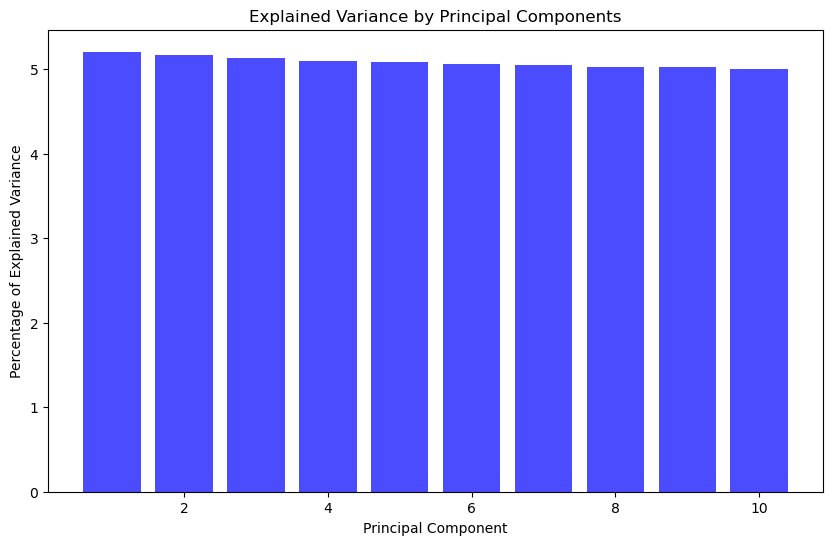

In [4]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, color='b')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Components')
plt.show()



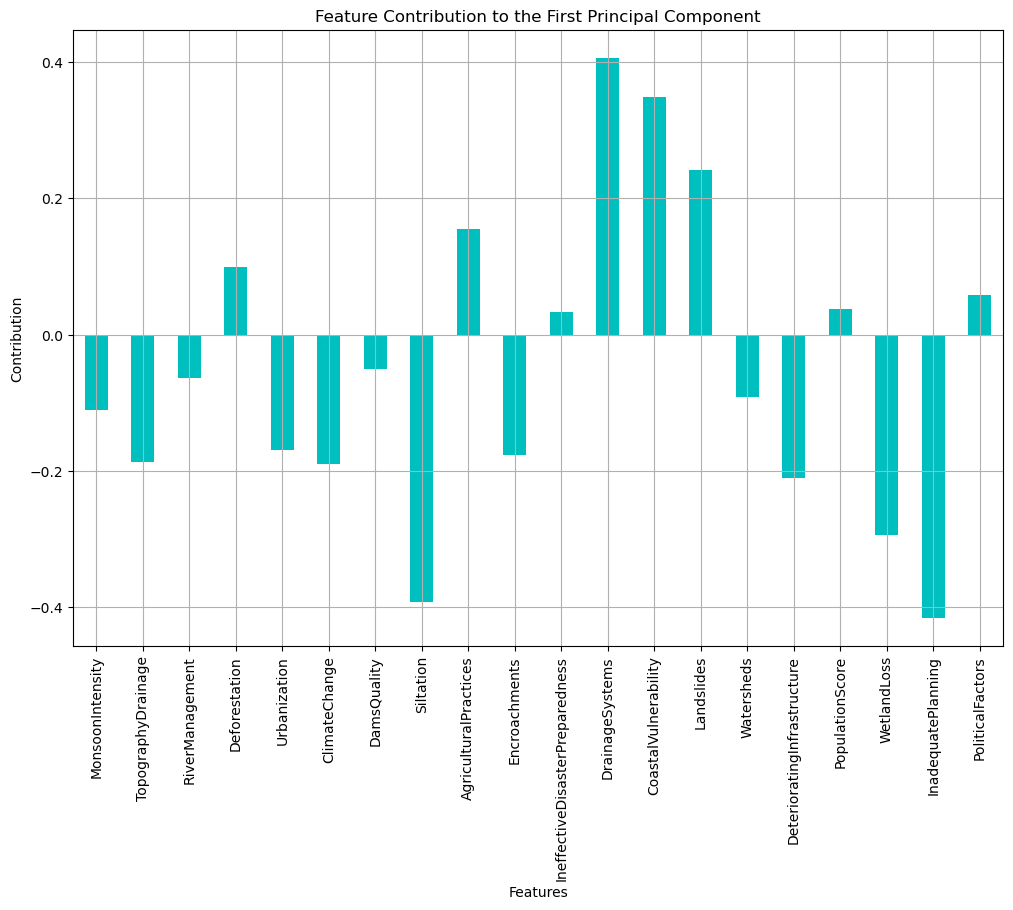

In [5]:
# Feature contribution to the first principal component
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Plot feature contribution for the first two principal components
plt.figure(figsize=(12, 8))
components.loc['PC1'].plot(kind='bar', color='c')
plt.title('Feature Contribution to the First Principal Component')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.grid(True)
plt.show()



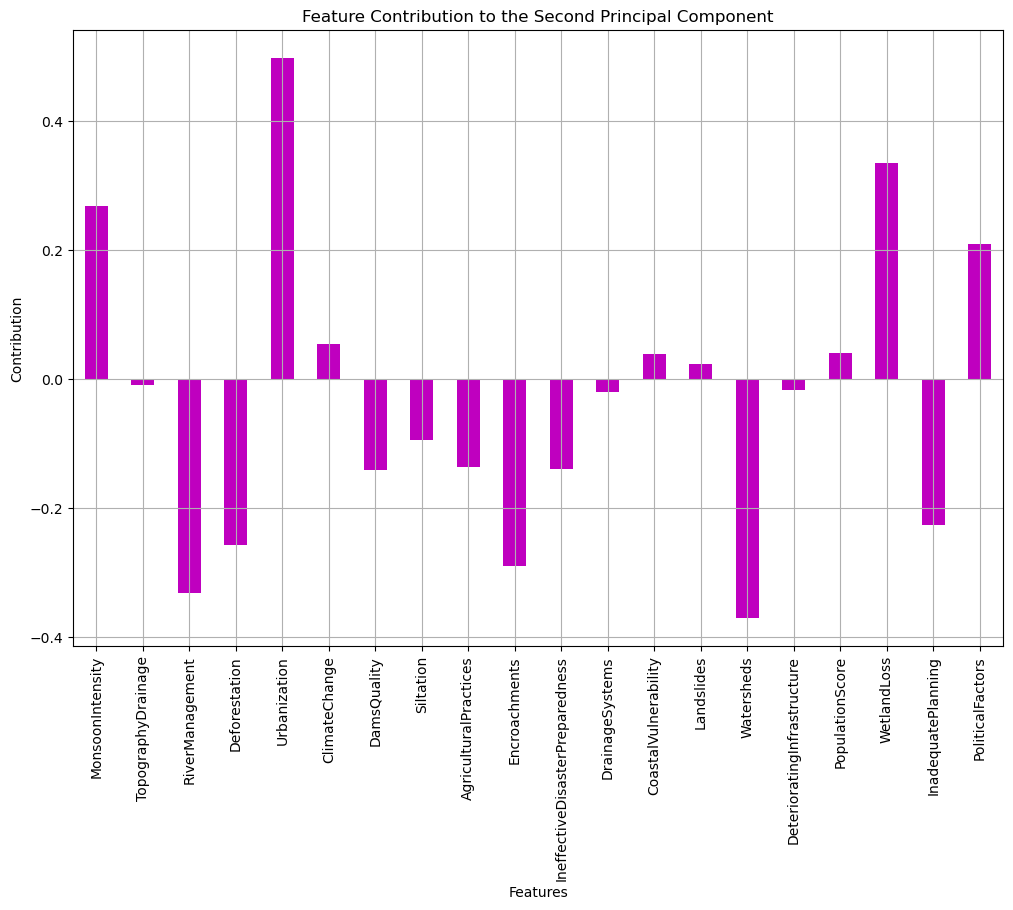

In [6]:
plt.figure(figsize=(12, 8))
components.loc['PC2'].plot(kind='bar', color='m')
plt.title('Feature Contribution to the Second Principal Component')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.grid(True)
plt.show()



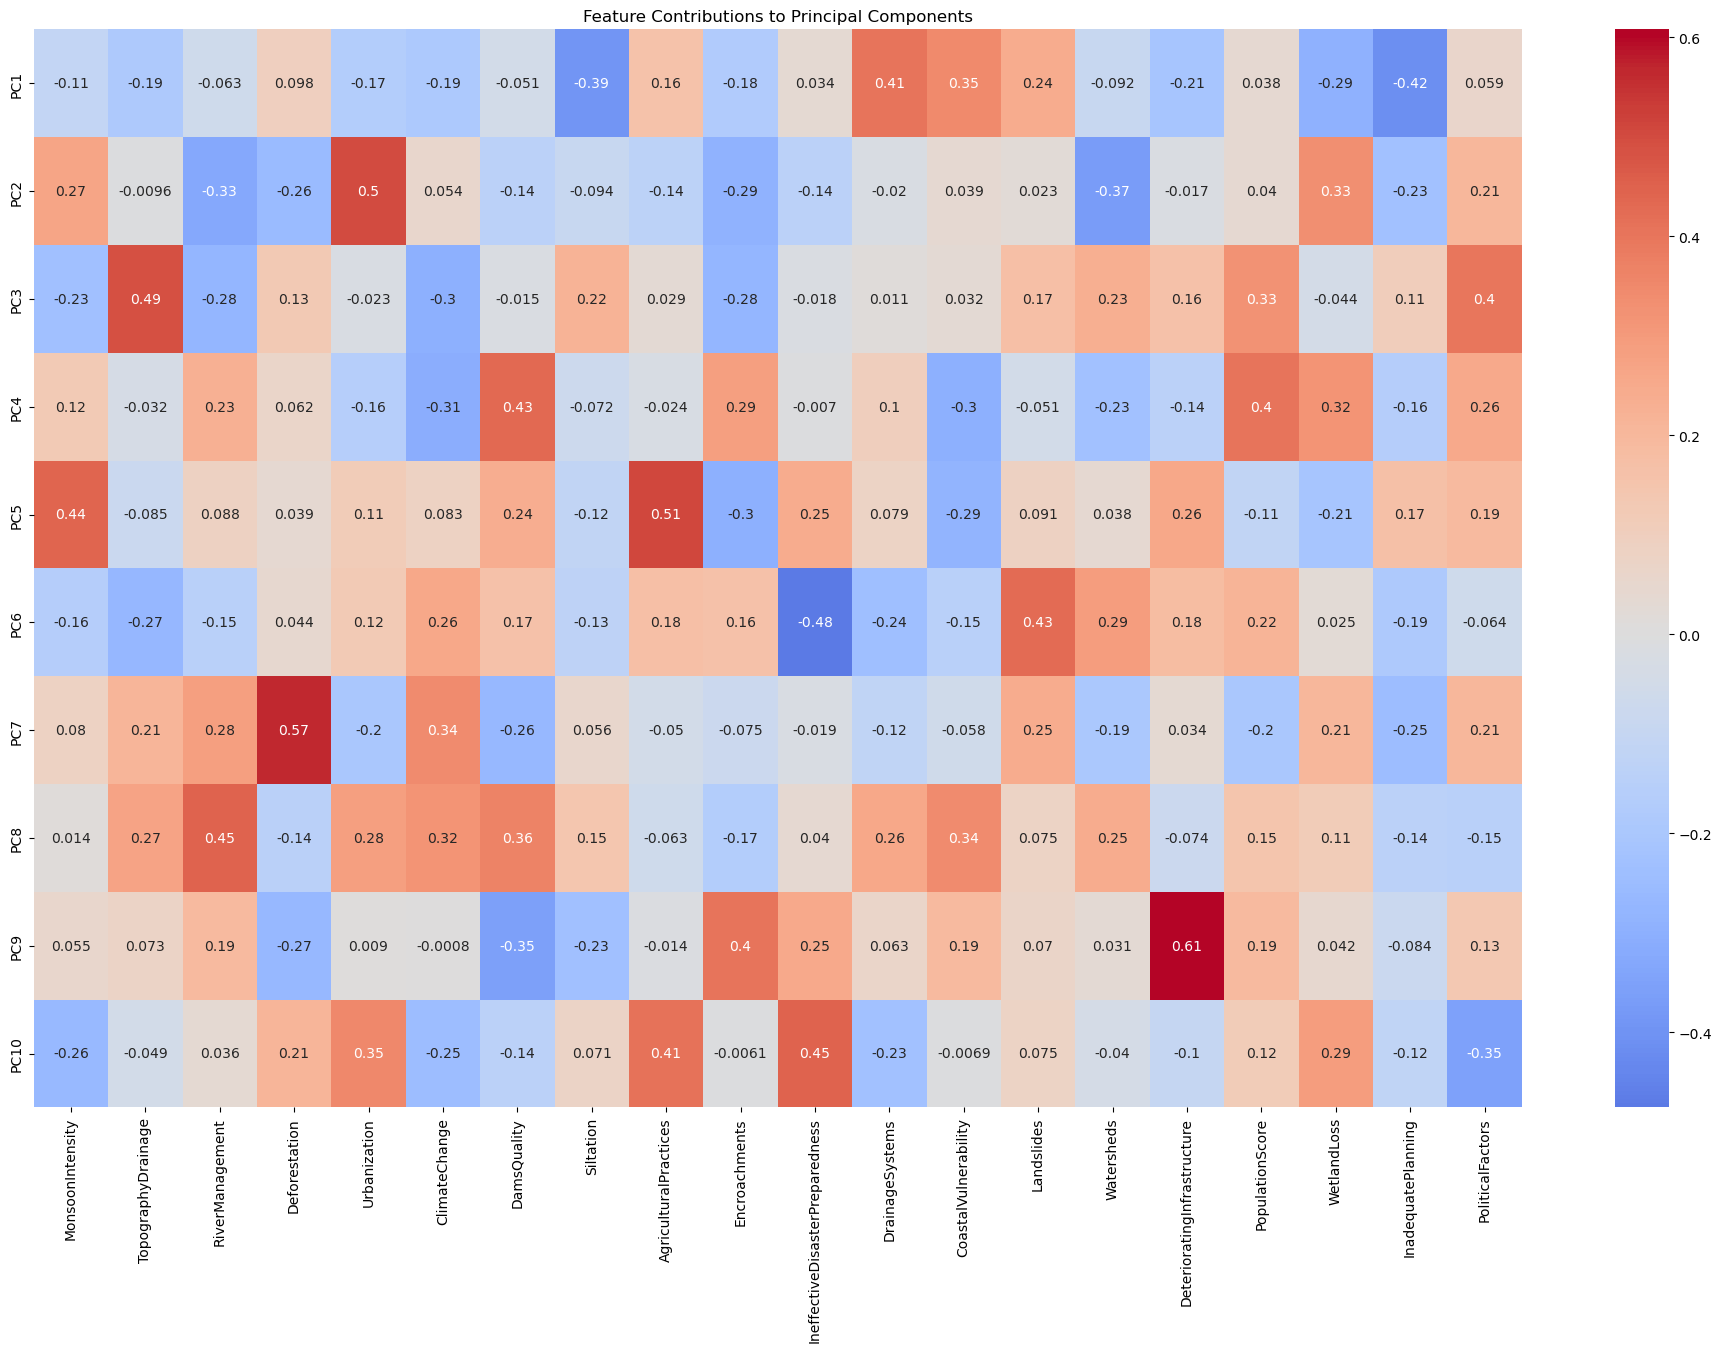

In [9]:
# Optional: Plot a heatmap of feature contributions to all components
import seaborn as sns

plt.figure(figsize=(24, 14))
sns.heatmap(components, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Contributions to Principal Components')
plt.show()
